# Homework 4 (Part II)

Aprendizagem 2023/2024 - LEIC @ IST 

Group #24
- Daniel Nunes (Nº 103095)
- Gonçalo Alves (Nº 103540)

## Data importing and normalization

In [1]:
import pandas as pd, numpy as np
from scipy.io.arff import loadarff

original_data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(original_data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop("class", axis=1)
y = df["class"]

display(df)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
normalized_data = scaler.fit_transform(X)

display(normalized_data)

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

## Exercise 1

Using sklearn, apply k-means clustering fully unsupervisedly on the normalized data with 
𝑘 ∈{2,3,4,5} (random=0 and remaining parameters as default). Assess the silhouette and purity of 
the produced solutions

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the range of k values to try
k_values = [2, 3, 4, 5]

# Perform k-means clustering for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    cluster_labels = kmeans.fit_predict(normalized_data)

    # For exercise 3, we will use the solution for k=3
    if (k == 3):
        k3_cluster_solution = cluster_labels.copy()
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    print(f"Silhouette score for k={k}: {silhouette_avg}")
    
    # Assess purity
    # You need to know the ground truth labels to calculate purity
    # If you don't have ground truth labels, purity cannot be calculated
    le = LabelEncoder()
    ground_truth_labels_encoded = le.fit_transform(y)
    
    # Assuming cluster_labels and ground_truth_labels_encoded have the same length
    accuracy = accuracy_score(ground_truth_labels_encoded, cluster_labels)
    print(f"Accuracy (Purity) for k={k}: {accuracy}\n")

Silhouette score for k=2: 0.3581243912917459
Accuracy (Purity) for k=2: 0.2967741935483871

Silhouette score for k=3: 0.2920953577230245
Accuracy (Purity) for k=3: 0.4612903225806452

Silhouette score for k=4: 0.21865213610632914
Accuracy (Purity) for k=4: 0.36129032258064514

Silhouette score for k=5: 0.21208383771390493
Accuracy (Purity) for k=5: 0.23870967741935484



## Exercise 2

Consider the application of PCA after the data normalization:

i. Identify the variability explained by the top two principal components.

In [4]:
from sklearn.decomposition import PCA

num_top_components = 2

pca = PCA(n_components=num_top_components)
principal_components = pca.fit_transform(normalized_data)

explained_var_ratio = pca.explained_variance_ratio_
print(f"Percentage of variability explained by the top two principal components:")
print("Component 1:", explained_var_ratio[0] * 100, "%")
print("Component 2:", explained_var_ratio[1] * 100, "%")

Percentage of variability explained by the top two principal components:
Component 1: 56.181444842992114 %
Component 2: 20.955952591361882 %


ii. For each one of these two components, sort the input variables by relevance by inspecting the absolute weights of the linear projection.

In [5]:
weights_abs = abs(pca.components_)

sorted_features_by_component = []
for component_idx in range(num_top_components):
    feature_weights = list(enumerate(weights_abs[component_idx]))
    sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)
    sorted_features_by_component.append(sorted_features)

# Print the sorted input variables for each of the top two components
features = list(df.columns.values)
for component_idx in range(num_top_components):
    print(f"Top features (Component {component_idx + 1})  Weight")
    i = 1
    for feature_idx, weight in sorted_features_by_component[component_idx]:
        feature_name = features[feature_idx]

        # Prnt the results in a neatly arranged table
        print("{}.{:<25} {:<20}".format(i, feature_name, weight))
        i = i+1
    print()

Top features (Component 1)  Weight
1.pelvic_incidence          0.5916206177372231  
2.lumbar_lordosis_angle     0.515084762073092   
3.pelvic_tilt               0.4670394389672722  
4.sacral_slope              0.32568886255691937 
5.degree_spondylolisthesis  0.21692963450485375 
6.pelvic_radius             0.11582397626328875 

Top features (Component 2)  Weight
1.pelvic_tilt               0.6703727595553639  
2.pelvic_radius             0.5810738370953586  
3.sacral_slope              0.44330299494707504 
4.pelvic_incidence          0.10003707489152272 
5.lumbar_lordosis_angle     0.08004745059088425 
6.degree_spondylolisthesis  0.004582909709400146



**Our answer**

## Exercise 3

Visualize side-by-side the data using: i) the ground diagnoses, and ii) the previously learned k=3 clustering solution. To this end, projected the normalized data onto a 2-dimensional data space using PCA and then color observations using the reference and cluster annotations. 

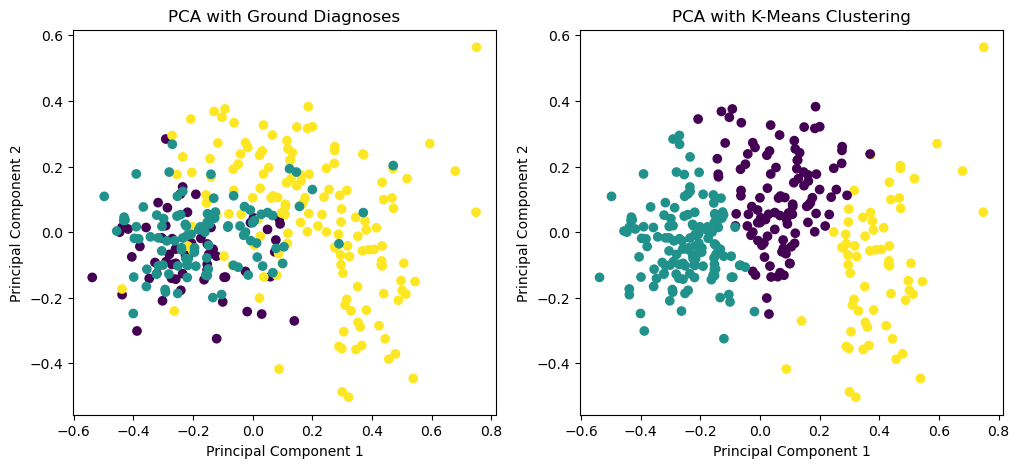

In [6]:
import matplotlib.pyplot as plt

# Use a Label Encocoder to translate each ground diagnose (target label) into a color code
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Create a scatter plot for the reference annotations (ground diagnoses)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_numeric, cmap='viridis')
plt.title("PCA with Ground Diagnoses")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Create a scatter plot for the cluster annotations (k-means clustering)
plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=k3_cluster_solution, cmap='viridis')
plt.title("PCA with K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

## Exercise 4

Considering the results from questions (1) and (3), identify two ways on how clustering can be used to characterize the population of ill and healthy individuals. 

**Our answer**

TODO: COMMENT